# DQR – Data Quality Report

![](https://github.com/th14g0cust0d10/imagens/blob/main/House-Valuation.png)

![](HouseValuation.png)

*Portfólio Thiago Gonçalves Custódio*

##  1. Definição do Problema 

A empresa precisa de um relatório que demonstre que os dados são confiáveis 
e coerentes e que a qualidade da informação que eles oferecem pode ser usada para modelos de previsão de fraudes e valor do imóvel. Sendo assim apresentaremos um DQR – Data Quality Report

### 1.1 Informações sobre o DataSet

Para este projeto usaremos dados reais disponíveis publicamente. Os dados podem ser 
baixados no portal de dados abertos da Cidade de Nova Iorque:

https://data.cityofnewyork.us/Housing-Development/Property-Valuation-and-Assessment-Data/rgy2-tti8

## 2. Pré-Processamento

### 2.1 Instalando e Carregando os Pacotes

In [1]:
!pip install -q -U watermark

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Thiago Gonçalves Custódio" --iversions

Author: Thiago Gonçalves Custódio

seaborn   : 0.11.1
pandas    : 1.2.2
matplotlib: 3.4.0
numpy     : 1.20.1



### 2.2 Carga do Dados / DataSet

In [2]:
# Carrega os dados
df = pd.read_csv('dados/dataset.csv', index_col = 0)

### 2.3. Análise Exploratória do DataSet

In [3]:
# Shape
df.shape

(1070994, 31)

In [4]:
# Visualiza amostra dos dados
df.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [5]:
# Colunas
df.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [6]:
# Resumo
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("\nVariáveis: \n", df.columns.tolist())
print("\nValores Ausentes: \n" , df.isnull().sum())
print("\nValores Únicos: \n", df.nunique())

Linhas:  1070994
Colunas:  31

Variáveis: 
 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores Ausentes: 
 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non

In [8]:
# Colunas numéricas (quantitativas)
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

In [9]:
# Colunas categóricas
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [10]:
# Verifica se o total de variáveis está coberto nos objetos anteriores
len(num_cols) + len(cat_cols) == 31

True

In [11]:
# Dataframes com os tipos diferentes de variáveis
df_num = df[num_cols]
df_cat = df[cat_cols]

In [12]:
# Sumário estatístico das variáveis numéricas
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Tipo de Dado'] = df_num.dtypes.values
summ_num['# Registros Não Nulos'] = df_num.count().values
summ_num['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populado'] = round(summ_num['# Registros Não Nulos'] / df_num.shape[0]*100,2)
summ_num['# Valores Únicos'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00


Observando o sumário estatístico das variáveis numéricas, percebemos 4 das 14 variáveis (28,6%) com baixo % populado.

In [13]:
# Sumário estatístico das variáveis categóricas
summ_cat = pd.DataFrame(index = df_cat.columns)
summ_cat['Tipo de Dado'] = df_cat.dtypes.values
summ_cat['# Registros Não Nulos'] = df_cat.count().values
summ_cat['% Populado'] = round(summ_cat['# Registros Não Nulos'] / df_cat.shape[0]*100,2)
summ_cat['# Valores Únicos'] = df_cat.nunique().values

In [14]:
# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Valores Mais Comuns'] = temp

In [15]:
summ_cat.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
BBLE,object,1070994,100.00,1070994,2039443957
BLDGCL,object,1070994,100.00,200,R4
YEAR,object,1070994,100.00,1,2010/11
PERIOD,object,1070994,100.00,1,FINAL
B,int64,1070994,100.00,5,4
TAXCLASS,object,1070994,100.00,11,1
VALTYPE,object,1070994,100.00,1,AC-TR
LOT,int64,1070994,100.00,6366,1
BLOCK,int64,1070994,100.00,13984,3944
STADDR,object,1070318,99.94,839280,501 SURF AVENUE


Observando o sumário estatístico das variáveis categóricas, percebemos 5 das 17 variáveis (29,4%) com baixo % populado.

### 2.3.1. Identificação, Exploração e Visualização das Variáveis

Tendo por objetivo avaliar se o DataSet pode ser usado para modelos de previsão de fraudes e valor do imóvel, definimos por estratégia de relevância explorar a visualização apenas das variáveis acima de 90% populadas, uma vez que estratégias de imputação junto as variáveis de baixo valor populadas aqui descartadas, seria praticamente inviável.

In [16]:
# Variáveis
df.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [17]:
# Visualiza
df.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


**Variável 1** \
Nome da Variável: BBLE \
Descrição: Concatenação de código Borough, código de bloco, código LOT; um número exclusivo para cada registro.

In [18]:
# Contagem
BBLE = df_cat['BBLE'].value_counts().rename_axis('Unique_values_BBLE').reset_index(name = 'Counts')
BBLE[:10]

,Unique_values_BBLE,Counts
0,2039443957,1
1,4049910048,1
2,4039740089,1
3,5024522064,1
4,3084790025,1
5,3008300012,1
6,1020941110,1
7,3062490051,1
8,2024500121,1
9,5065800043,1


**Variável 2** \
Nome da Variável: B \
Descrição: Códigos Borough 

Text(0.5, 1.0, 'Número de Propriedades em Diferentes Bairros')

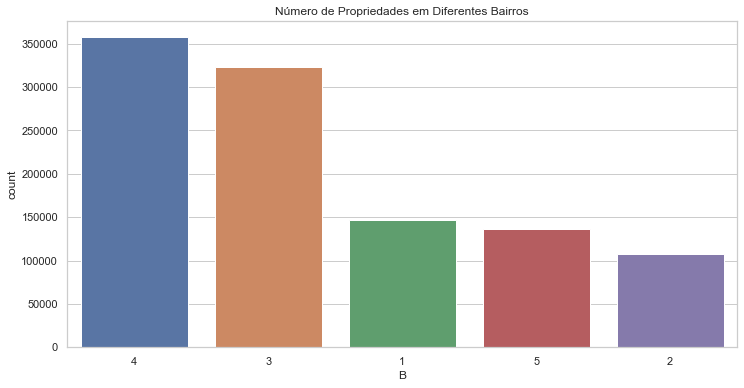

In [19]:
# Visualização da variável 2
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig1 = sns.countplot(x = 'B', data = df, order = df['B'].value_counts().index)
plt.title("Número de Propriedades em Diferentes Bairros")

**Variável 3** \
Nome da Variável: BLOCK \
Descrição: Número de até 5 dígitos que representam códigos de bloco em diferentes bairros

In [20]:
# Contagem
BLOCK = df_cat['BLOCK'].value_counts().rename_axis('Unique_values_BLOCK').reset_index(name = 'Counts')
BLOCK[:10]

,Unique_values_BLOCK,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


**Variável 4** \
Nome da Variável: LOT \
Descrição: Número de até 4 dígitos que representam códigos de lote em diferentes Borough & Block

In [21]:
# Contagem
LOT = df_cat['LOT'].value_counts().rename_axis('Unique_values_LOT').reset_index(name = 'Counts')[:15]
LOT[:10]

,Unique_values_LOT,Counts
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982
7,18,11979
8,25,11949
9,21,11840


**Variável 5** \
Nome da Variável: OWNER \
Descrição: Proprietários dos imóveis

In [22]:
# Contagem
OWNER = df_cat['OWNER'].value_counts().rename_axis('Unique_values_OWNER').reset_index(name = 'Counts')

In [23]:
OWNER.head()

,Unique_values_OWNER,Counts
0,PARKCHESTER PRESERVAT,6020
1,PARKS AND RECREATION,4255
2,DCAS,2169
3,HOUSING PRESERVATION,1904
4,CITY OF NEW YORK,1450


In [24]:
OWNER.tail()

,Unique_values_OWNER,Counts
863341,SCOGNAMIGLIO JOHN,1
863342,ROBERTS BARBARA,1
863343,TOMICI ILDE,1
863344,LARDAS REV JOHN,1
863345,JASMINE PALMER,1


**Variável 6** \
Nome da Variável: BLDGCL \
Descrição: Classe do imóvel

In [25]:
# Contagem
BLDGCL = df_cat['BLDGCL'].value_counts().rename_axis('Unique_values_BLDCGL').reset_index(name = 'Counts')

In [26]:
BLDGCL.head()

,Unique_values_BLDCGL,Counts
0,R4,139879
1,A1,123369
2,A5,96984
3,B1,84208
4,B2,77598


In [27]:
BLDGCL.tail()

,Unique_values_BLDCGL,Counts
195,I3,4
196,I2,4
197,H7,3
198,Y5,1
199,E6,1


**Variável 7** \
Nome da Variável: TAXCLASS \
Descrição: Código de classe de imposto de propriedade

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Classe')

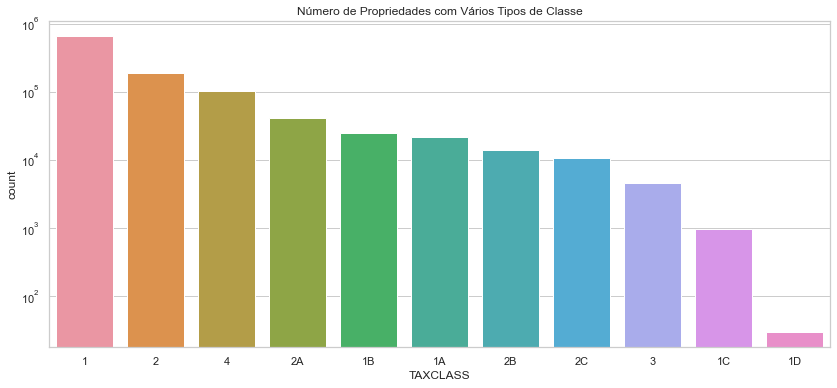

In [28]:
# Visualização da variável 7
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig3 = sns.countplot(x = 'TAXCLASS', data = df, order = df['TAXCLASS'].value_counts().index)
fig3.set_yscale("log")
fig3.set_title('Número de Propriedades com Vários Tipos de Classe')

**Variável 8** \
Nome da Variável: LTFRONT \
Descrição: Frente do lote em pés (feet)

In [29]:
# Divide em percentis
df['LTFRONT'].describe(percentiles = [0.5,0.75,0.995])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.5%       375.00
max        9999.00
Name: LTFRONT, dtype: float64

In [30]:
# Filtra por valores iguais ou menores que 375
tmp = df[df['LTFRONT'] <= 375]

Text(0.5, 1.0, 'Distribuição da Variável LTFRONT')

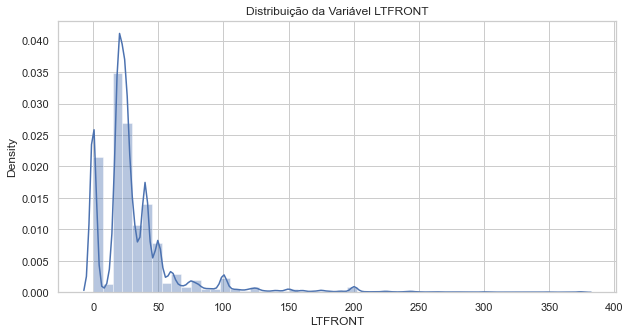

In [31]:
# Visualização da variável 9
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10, 5))
fig4 = sns.distplot(tmp.LTFRONT, bins = 50)
fig4.set_title('Distribuição da Variável LTFRONT')

**Variável 9** \
Nome da Variável: LTDEPTH \
Descrição: Profundidade do lote em pés (feet)

In [32]:
# Divide em percentis
df['LTDEPTH'].describe(percentiles = [0.18,0.25,0.4,0.83,0.98,0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
18%           49.00
25%           80.00
40%          100.00
50%          100.00
83%          101.00
98%          200.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [33]:
# Filtra por valores iguais ou menores que 425
tmp = df[df['LTDEPTH'] <= 425]

Text(0.5, 1.0, 'Distribuição da Variável LTDEPTH')

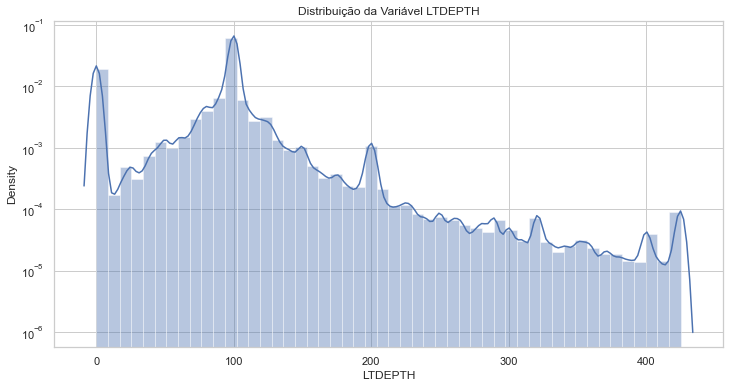

In [34]:
# Visualização da variável 10
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig5 = sns.distplot(tmp.LTDEPTH, bins = 50)
fig5.set_yscale("log")
fig5.set_title('Distribuição da Variável LTDEPTH')

**Variável 10**  \
Nome da Variável: STORIES \
Descrição: Número de andares do edifício

In [35]:
# Divide em percentis
df['STORIES'].describe(percentiles = [0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [36]:
# Filtra 
tmp = df[df['STORIES'] <= 50]

Text(0.5, 1.0, 'Distribuição de Andares das Propriedades')

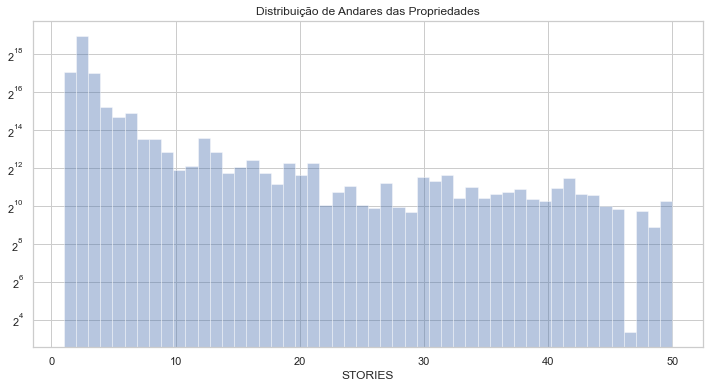

In [37]:
# Visualização da variável 12
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig7 = sns.distplot(tmp['STORIES'], kde = False, bins = 50)
fig7.set_yscale('log', basey = 2)
fig7.set_title('Distribuição de Andares das Propriedades')

**Variável 11** \
Nome da Variável: FULLVAL \
Descrição: Valor de Mercado Total

In [38]:
# Divide em percentis
df['FULLVAL'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [39]:
# Visualiza os dados
df['FULLVAL'].head()

RECORD
1    21400000.00
2   193800000.00
3   104686000.00
4    39200000.00
5   272300000.00
Name: FULLVAL, dtype: float64

In [40]:
# Filtra os dados para simplificar a visualização e evitar valores extremos
tmp = df[df['FULLVAL'] <= 3000000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado Total das Propriedades')

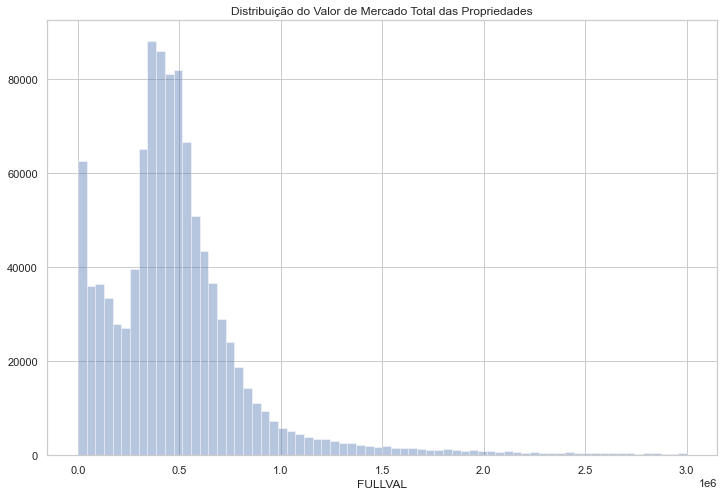

In [41]:
# Visualização da variável 11
dimensoes = (12, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig8 = sns.distplot(tmp.FULLVAL, kde = False, bins = 70)
fig8.set_title('Distribuição do Valor de Mercado Total das Propriedades')

**Variável 12** \
Nome da Variável: AVLAND \
Descrição: Valor de mercado do terreno

In [42]:
# Divide em percentis
df['AVLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [43]:
# Filtra os dados
tmp = df[df['AVLAND'] <= 50000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado do Terreno')

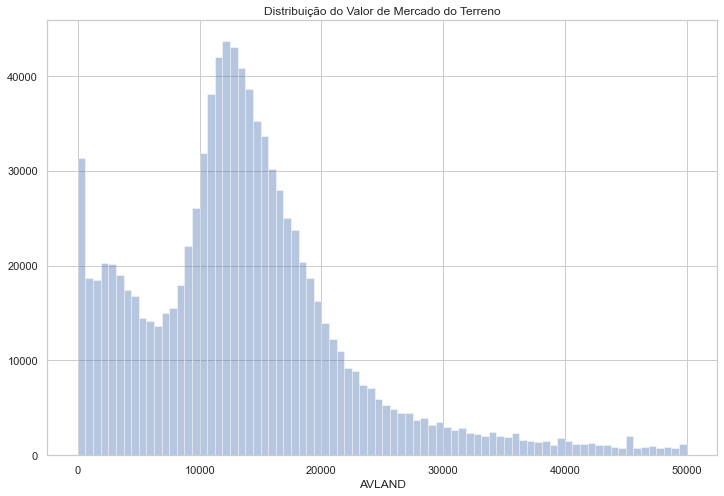

In [44]:
# Visualização da variável 12
dimensoes = (12, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig9 = sns.distplot(tmp.AVLAND, kde = False, bins = 80)
fig9.set_title('Distribuição do Valor de Mercado do Terreno')

**Variável 13** \
Nome da Variável: AVTOT \
Descrição: Valor Total

In [45]:
# Divide em percentis
df['AVTOT'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean        227238.17
std        6877529.31
min              0.00
50%          25340.00
75%          45438.00
95%         405000.00
max     4668308947.00
Name: AVTOT, dtype: float64

In [46]:
# Filtra os dados
tmp = df[df['AVTOT'] <= 500000]

Text(0.5, 1.0, 'Distribuição da Variável AVTOT ')

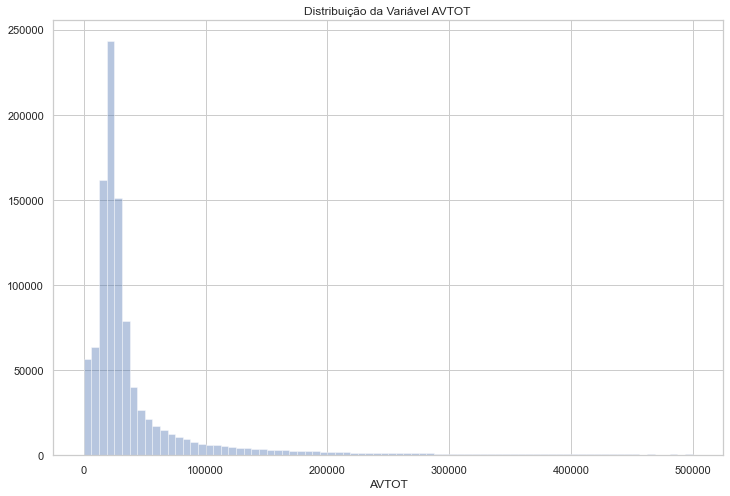

In [47]:
# Visualização da variável 13
dimensoes = (12, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig9 = sns.distplot(tmp.AVTOT, kde = False, bins = 80)
fig9.set_title('Distribuição da Variável AVTOT ')

**Variável 14** \
Nome da Variável: EXLAND \
Descrição: Valor provisório do terreno com isenção temporária

In [48]:
# Divide em percentis
df['EXLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [49]:
# Filtro
tmp = df[df['EXLAND'] <= 50000]

Text(0.5, 1.0, 'Valor Provisório do Terreno com Isenção Temporária')

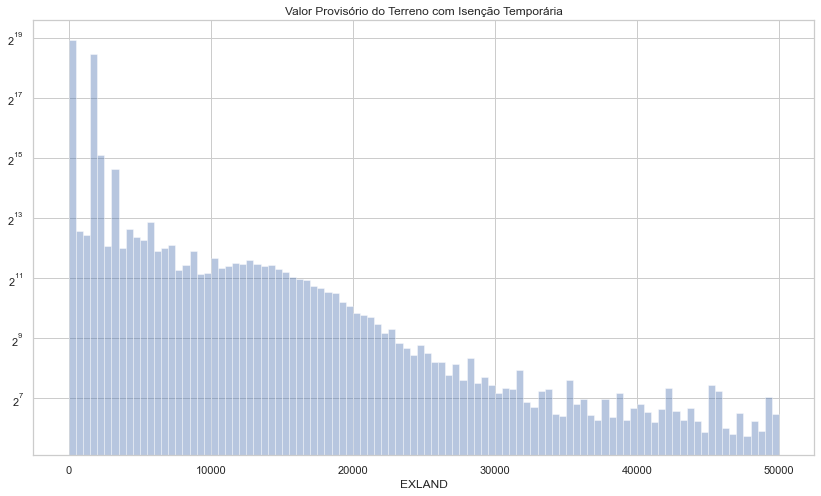

In [50]:
# Visualização da variável 14
dimensoes = (14, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.EXLAND, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Valor Provisório do Terreno com Isenção Temporária')

**Variável 15** \
Nome da Variável: EXTOT \
Descrição: Valor total do terreno com isenção temporária

In [51]:
# Divide em percentis
df['EXTOT'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         91186.98
std        6508402.82
min              0.00
50%           1620.00
75%           2090.00
95%          61420.40
max     4668308947.00
Name: EXTOT, dtype: float64

In [52]:
# Filtro
tmp = df[df['EXTOT'] <= 500000]

Text(0.5, 1.0, 'Distribuição da Variável EXTOT')

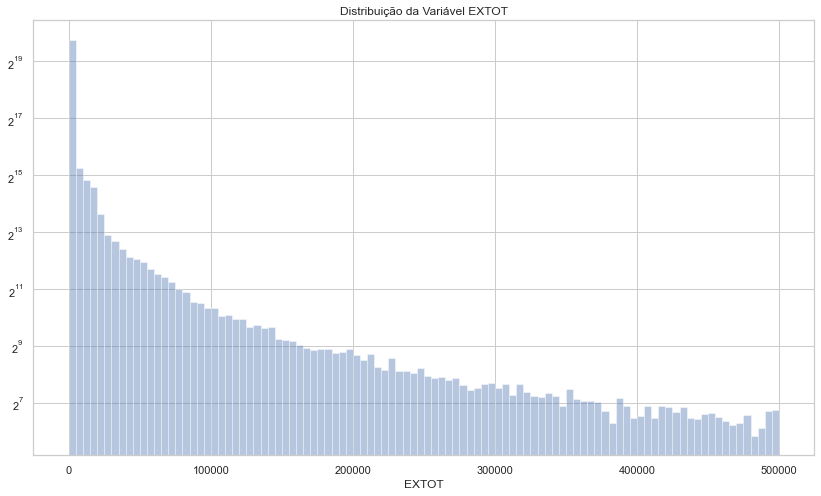

In [53]:
# Visualização da variável 15
dimensoes = (14, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.EXTOT, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Distribuição da Variável EXTOT')

**Variável 16** \
Nome da Variável: STADDR \
Descrição: Endereço das propriedades

In [54]:
# Contagem
STADDR = df_cat['STADDR'].value_counts().rename_axis('Unique_values_STADDR').reset_index(name = 'Counts')
STADDR[:10]

,Unique_values_STADDR,Counts
0,501 SURF AVENUE,902
1,330 EAST 38 STREET,817
2,322 WEST 57 STREET,720
3,155 WEST 68 STREET,671
4,20 WEST 64 STREET,657
5,1 IRVING PLACE,650
6,220 RIVERSIDE BOULEVARD,628
7,360 FURMAN STREET,599
8,200 EAST 66 STREET,585
9,30 WEST 63 STREET,562


**Variável 17** \
Nome da Variável: ZIP \
Descrição: Código postal das propriedades

In [55]:
# Contagem
ZIP = df_cat['ZIP'].value_counts().rename_axis('Unique_values_ZIP').reset_index(name = 'Counts')
ZIP[:10]

,Unique_values_ZIP,Counts
0,10314.00,24606
1,11234.00,20001
2,10312.00,18127
3,10462.00,16905
4,10306.00,16578
5,11236.00,15678
6,11385.00,14921
7,11229.00,12793
8,11211.00,12710
9,11207.00,12293


**Variável 18** \
Nome da Variável: BLDFRONT \
Descrição: Frente do lote em pés.

In [56]:
# Divide em percentis
df['BLDFRONT'].describe(percentiles = [0.5,0.75,0.95])

count   1070994.00
mean         23.04
std          35.58
min           0.00
50%          20.00
75%          24.00
95%          63.00
max        7575.00
Name: BLDFRONT, dtype: float64

In [57]:
# Filtro
tmp = df[df['BLDFRONT'] <= 20000]

Text(0.5, 1.0, 'Distribuição da Variável BLDFRONT')

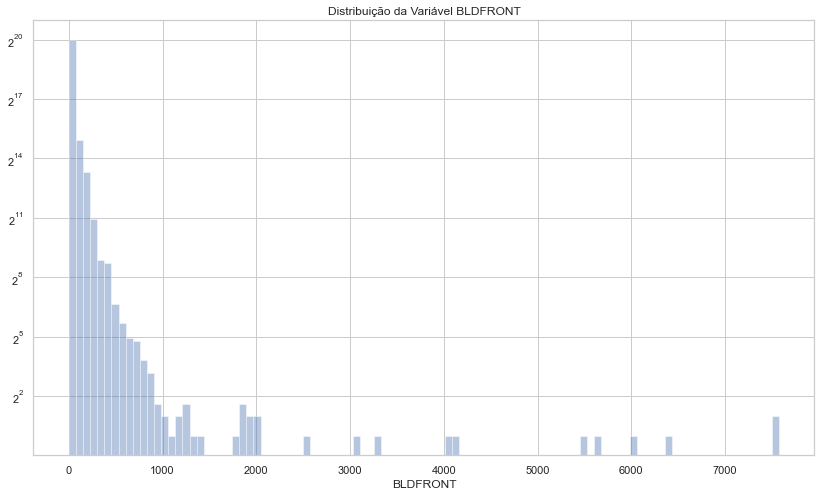

In [58]:
# Visualização da variável 18
dimensoes = (14, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.BLDFRONT, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Distribuição da Variável BLDFRONT')

**Variável 19** \
Nome da Variável: BLDDEPTH \
Descrição: Profundidade do lote em pés.

In [59]:
# Divide em percentis
df['BLDDEPTH'].describe(percentiles = [0.5,0.75,0.95])

count   1070994.00
mean         39.92
std          42.71
min           0.00
50%          39.00
75%          50.00
95%          90.00
max        9393.00
Name: BLDDEPTH, dtype: float64

In [60]:
# Filtro
tmp = df[df['BLDDEPTH'] <= 20000]

Text(0.5, 1.0, 'Distribuição da Variável BLDDEPTH ')

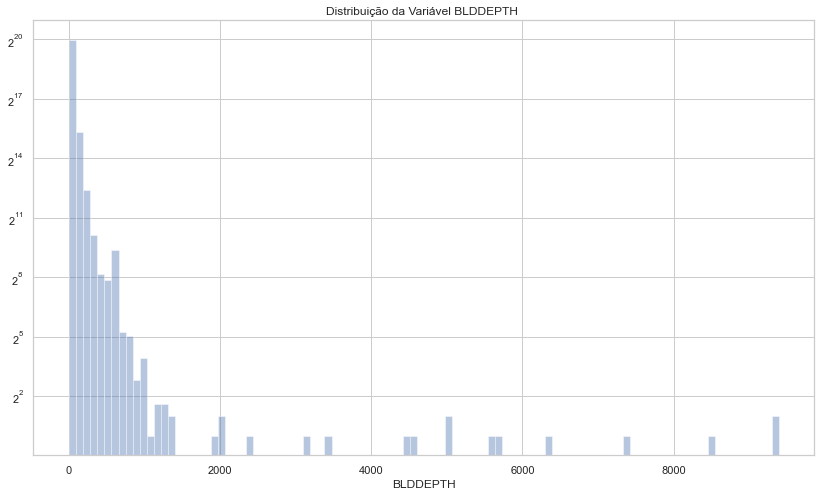

In [61]:
# Visualização da variável 19
dimensoes = (14, 8)
fig, ax = plt.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.BLDDEPTH, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Distribuição da Variável BLDDEPTH ')

## 3. Limpeza e Transformação dos Dados

Nesta etapa entregaremos uma rotina de limpeza das variáveis STADDR, OWNER, STORIES e uma estratégia de transformação / imputação nos valores ausentes da variável ZIP com objetivo de demonstração de possibilidade / alternativa de data munging/wrangling.

In [62]:
# Vamos trabalhar com uma cópia do dataframe descartando das variáveis abaixo de 90% populadas
df_temp = df.copy()

In [63]:
# Lista das variáveis abaixo de 90% populadas
columns = ['AVLAND2','AVTOT2','EXTOT2','EXLAND2','EXCD1','EXT','EXCD2','EXMPTCL','EASEMENT']

In [64]:
# Descarte das variáveis abaixo de 90% populadas
df_temp = df.drop(columns, axis=1)

In [65]:
# Sumário após descarte de variaveis abaixo de 90% populadas
summ_df = pd.DataFrame(index = df_temp.columns)
summ_df['Tipo de Dado'] = df_temp.dtypes.values
summ_df['# Registros Não Nulos'] = df_temp.count().values
summ_df['% Populado'] = round(summ_df['# Registros Não Nulos'] / df_temp.shape[0]*100,2)
summ_df['# Valores Únicos'] = df_temp.nunique().values
summ_df.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos
BBLE,object,1070994,100.00,1070994
FULLVAL,float64,1070994,100.00,109324
YEAR,object,1070994,100.00,1
PERIOD,object,1070994,100.00,1
BLDDEPTH,int64,1070994,100.00,621
BLDFRONT,int64,1070994,100.00,612
EXTOT,float64,1070994,100.00,64255
EXLAND,float64,1070994,100.00,33419
AVTOT,float64,1070994,100.00,112914
B,int64,1070994,100.00,5


### 3.1. Limpeza dos Valores Ausentes das Variáveis STADDR, OWNER e STORIES

In [66]:
# Definindo a lista de variáveis a serem limpas
list_clean = ['STADDR', 'OWNER', 'STORIES']

In [67]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_clean:
    print(i, "--> Número de valores ausentes:", df_temp[i].isna().sum())

STADDR --> Número de valores ausentes: 676
OWNER --> Número de valores ausentes: 31745
STORIES --> Número de valores ausentes: 56264


In [68]:
# Excluindo valores NA 
df_temp.dropna(subset=list_clean, inplace=True)

In [69]:
# Checando resultado da exclusão
df_temp.isna().sum()

BBLE           0
B              0
BLOCK          0
LOT            0
OWNER          0
BLDGCL         0
TAXCLASS       0
LTFRONT        0
LTDEPTH        0
STORIES        0
FULLVAL        0
AVLAND         0
AVTOT          0
EXLAND         0
EXTOT          0
STADDR         0
ZIP         1217
BLDFRONT       0
BLDDEPTH       0
PERIOD         0
YEAR           0
VALTYPE        0
dtype: int64

### 3.2. Transformação dos Valores Ausentes da Variável ZIP

In [70]:
# Contagem de valores ausentes
df_temp['ZIP'].isna().sum()

1217

In [71]:
# Vamos calcular o valor da variável zip que aparece com maior frequência (calcular a moda)
# Se não houver nenhum valor de moda, substitua por 1
def calcula_moda(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [72]:
# Definindo a função de contagem para calcular a frequência do valor da moda de cada grupo (que vamos definir)
def contagem(x):
    return x.value_counts().head(1)

In [73]:
# Agrupando valores pela variável 'B' e 'BLOCK' e usando as duas funções acima para criar dataframe auxiliar
# Teremos o valor da moda da variável ZIP para cada grupo com registros com as variáveis B e Block
df_zip_group = df_temp.groupby(['B','BLOCK'])['ZIP'].agg(ZIP = calcula_moda, Count = contagem).reset_index()

In [74]:
# Verificando os 25 primeiros registros
df_zip_group.head(15)

,B,BLOCK,ZIP,Count
0,1,2,10004.00,2
1,1,3,10004.00,3
2,1,4,10004.00,52
3,1,5,10004.00,5
4,1,7,10004.00,12
5,1,8,10004.00,3
6,1,9,10004.00,4
7,1,10,10004.00,8
8,1,11,10004.00,13
9,1,12,10004.00,1


In [75]:
# Definindo a função que preenche os registros com valor ZIP ausente por meio do dataframe auxiliar
def preenche_moda(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [76]:
# Usando a função para preencher os valores ZIP ausentes
df_temp['ZIP'] = df_temp.apply(preenche_moda, axis = 1)

In [77]:
# Verificando se há algum valor ZIP restante com valor NA
df_temp['ZIP'].isna().sum()

0

In [78]:
# Verificando manualmente uma das ocorrências para checar se a fórmula funcionou corretamente
df_temp[(df_temp['B']==1) & (df_temp['BLOCK']==38)]['ZIP']

RECORD
6147   10005.00
6148   10005.00
Name: ZIP, dtype: float64

In [79]:
# Checando resultado da imputação no valores ZIP e eventuais impactos nas demais variaveis
df_temp.isna().sum()

BBLE        0
B           0
BLOCK       0
LOT         0
OWNER       0
BLDGCL      0
TAXCLASS    0
LTFRONT     0
LTDEPTH     0
STORIES     0
FULLVAL     0
AVLAND      0
AVTOT       0
EXLAND      0
EXTOT       0
STADDR      0
ZIP         0
BLDFRONT    0
BLDDEPTH    0
PERIOD      0
YEAR        0
VALTYPE     0
dtype: int64

In [80]:
# % Sumário das variáveis apos data munging/wrangling
summ_df = pd.DataFrame(index = df_temp.columns)
summ_df['Tipo de Dado'] = df_temp.dtypes.values
summ_df['# Registros Não Nulos'] = df_temp.count().values
summ_df['% Populado'] = round(summ_df['# Registros Não Nulos'] / df_temp.shape[0]*100,2)
summ_df['# Valores Únicos'] = df_temp.nunique().values
summ_df.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos
BBLE,object,985951,100.00,985951
B,int64,985951,100.00,5
YEAR,object,985951,100.00,1
PERIOD,object,985951,100.00,1
BLDDEPTH,int64,985951,100.00,618
BLDFRONT,int64,985951,100.00,610
ZIP,float64,985951,100.00,194
STADDR,object,985951,100.00,815655
EXTOT,float64,985951,100.00,59005
EXLAND,float64,985951,100.00,31041


In [81]:
# Colunas numéricas (quantitativas)
num_cols2 = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH']

In [82]:
# Colunas categóricas
cat_cols2 = ['BBLE', 'B', 'BLOCK', 'LOT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'STADDR', 'ZIP', 'PERIOD', 'YEAR', 'VALTYPE']

In [83]:
# Dataframes com os tipos diferentes de variáveis
df_num = df_temp[num_cols2]
df_cat = df_temp[cat_cols2]

In [84]:
# Sumário estatístico final das variáveis numéricas
summ_num2 = pd.DataFrame(index = df_num.columns)
summ_num2['Tipo de Dado'] = df_num.dtypes.values
summ_num2['# Registros Não Nulos'] = df_num.count().values
summ_num2['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num2['% Populado'] = round(summ_num2['# Registros Não Nulos'] / df_num.shape[0]*100,2)
summ_num2['# Valores Únicos'] = df_num.nunique().values
summ_num2['Mean'] = round(df_num.mean(),2)
summ_num2['Std'] = round(df_num.std(),2)
summ_num2['Min'] = round(df_num.min(),2)
summ_num2['Max'] = round(df_num.max(),2)
summ_num2.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
LTFRONT,int64,985951,840595,100.00,1071,35.07,58.72,0.00,9999.00
LTDEPTH,int64,985951,839427,100.00,1083,88.40,62.10,0.00,9999.00
STORIES,float64,985951,985951,100.00,110,4.83,8.20,1.00,119.00
FULLVAL,float64,985951,983907,100.00,88259,880209.45,8447777.04,0.00,5279000000.00
AVLAND,float64,985951,983905,100.00,64744,74632.22,2154894.62,0.00,1792808947.00
AVTOT,float64,985951,983907,100.00,101913,222557.84,6041959.47,0.00,4668308947.00
EXLAND,float64,985951,561670,100.00,31041,25537.94,1999998.95,0.00,1792808947.00
EXTOT,float64,985951,617183,100.00,59005,80659.55,5590524.17,0.00,4668308947.00
BLDFRONT,int64,985951,830600,100.00,610,24.28,35.72,0.00,7575.00
BLDDEPTH,int64,985951,830586,100.00,618,42.37,41.73,0.00,9393.00


In [85]:
# Sumário estatístico final das variáveis categóricas
summ_cat2 = pd.DataFrame(index = df_cat.columns)
summ_cat2['Tipo de Dado'] = df_cat.dtypes.values
summ_cat2['# Registros Não Nulos'] = df_cat.count().values
summ_cat2['% Populado'] = round(summ_cat2['# Registros Não Nulos'] / df_cat.shape[0]*100,2)
summ_cat2['# Valores Únicos'] = df_cat.nunique().values

In [86]:
# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols2:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat2['Valores Mais Comuns'] = temp

In [87]:
summ_cat2.sort_values(by=['% Populado'], ascending=False)

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
BBLE,object,985951,100.00,985951,2039443957
B,int64,985951,100.00,5,4
BLOCK,int64,985951,100.00,13750,3944
LOT,int64,985951,100.00,6251,1
OWNER,object,985951,100.00,847158,PARKCHESTER PRESERVAT
BLDGCL,object,985951,100.00,186,R4
TAXCLASS,object,985951,100.00,11,1
STADDR,object,985951,100.00,815655,501 SURF AVENUE
ZIP,float64,985951,100.00,194,10314.0
PERIOD,object,985951,100.00,1,FINAL


In [88]:
# Salvando o dataframe resultante em disco
df_temp.to_csv('dados/dataset_zip_limpo.csv')

## 4. Conclusão

Sim, a quantidade de variáveis disponíveis no DataSet bem como seus respectivos preenchimentos permitem seu uso em modelos de previsão de fraudes e valor do imóvel, desde que realizada ações de limpeza e transformação em parte dados conforme exemplificamos.

## Entre em Contato!

Caso tenha alguma dúvida ou sugestão, entre em contato.

|Github |Linkedin|E-mail|
|:-----|:----:|----:|
|[![Img Alt Text](https://icongr.am/devicon/github-original.svg?size=25&color=currentColor)](https://github.com/th14g0cust0d10) |[![Img Alt Text](https://icongr.am/devicon/linkedin-plain.svg?size=25&color=currentColor)](https://www.linkedin.com/in/thiago-custodio/) |[![Img Alt Text](https://icongr.am/fontawesome/envelope.svg?size=25&color=currentColor)](mailto:th14g0cust0d10@gmail.com) |
